<a href="https://colab.research.google.com/github/gowtham-dd/LinearRegression/blob/main/EcomercePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv("/content/Ecommerce Customers.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


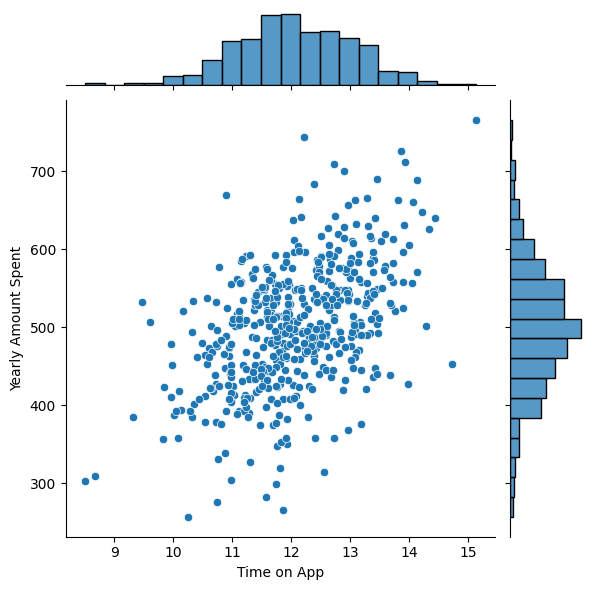

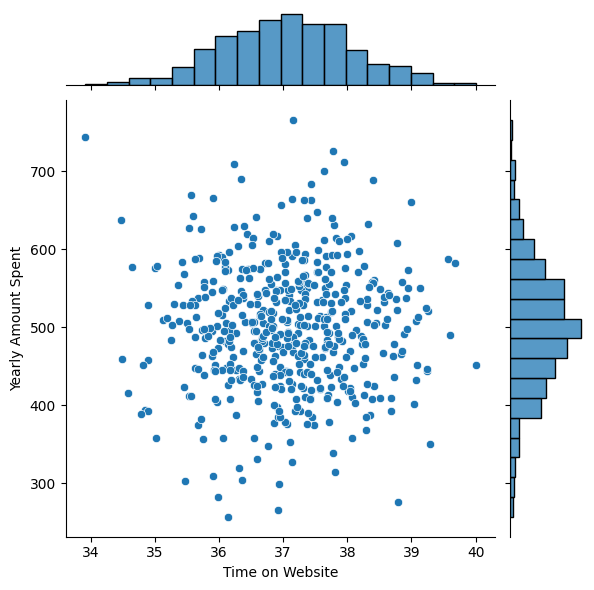

In [ ]:
#Exploring data
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data)
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data)

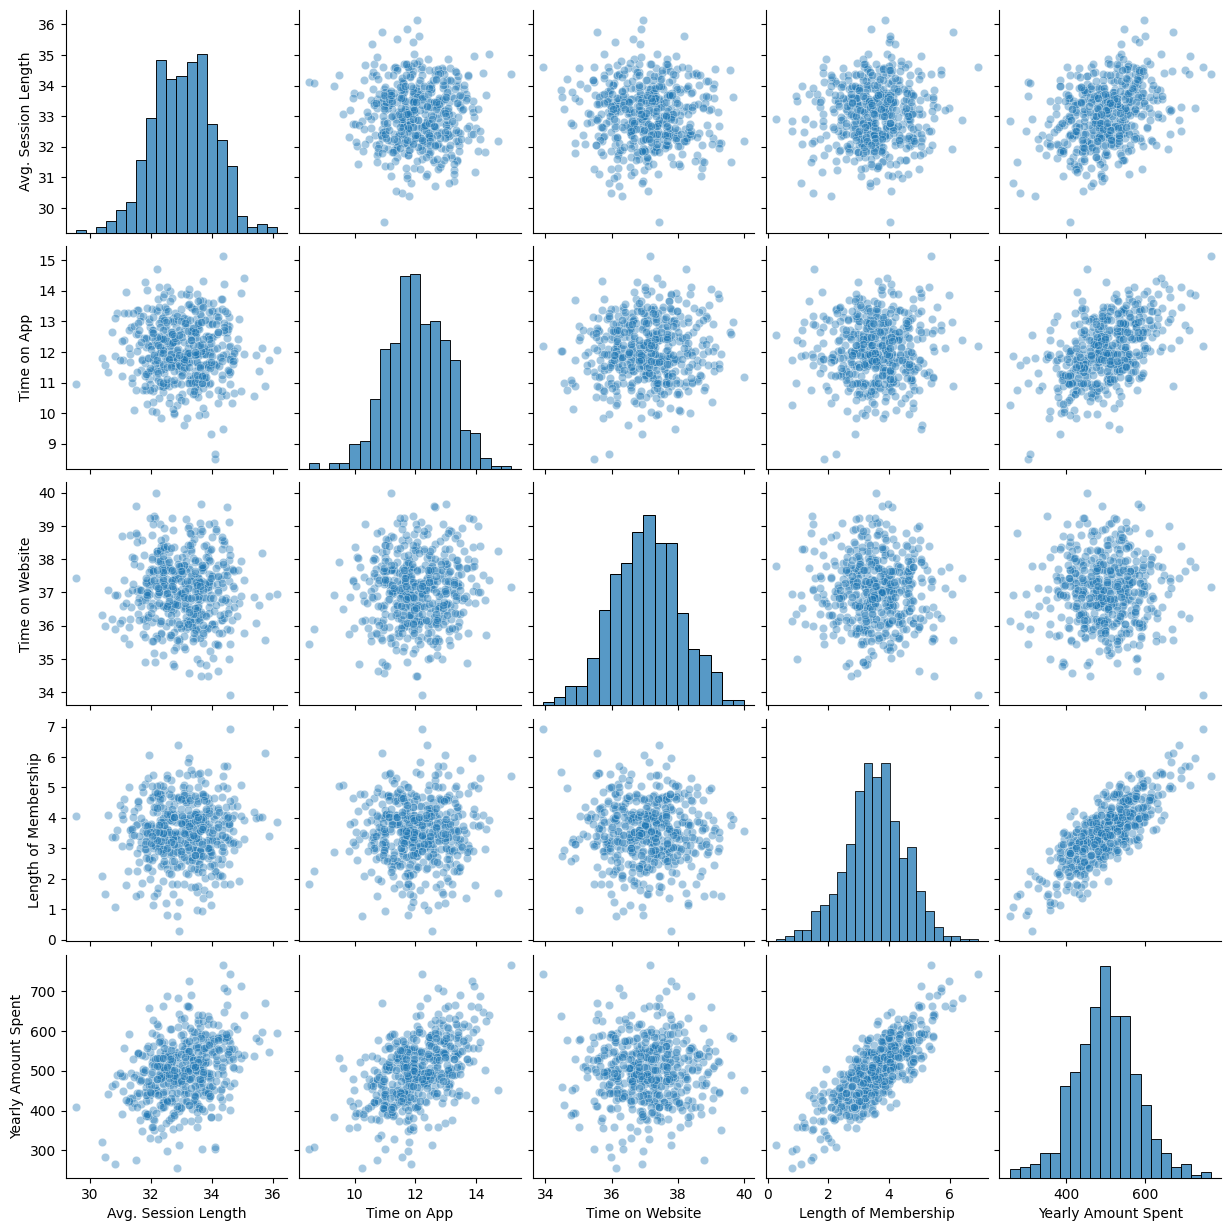

In [ ]:
sns.pairplot(data,kind="scatter",plot_kws={'alpha':0.4})

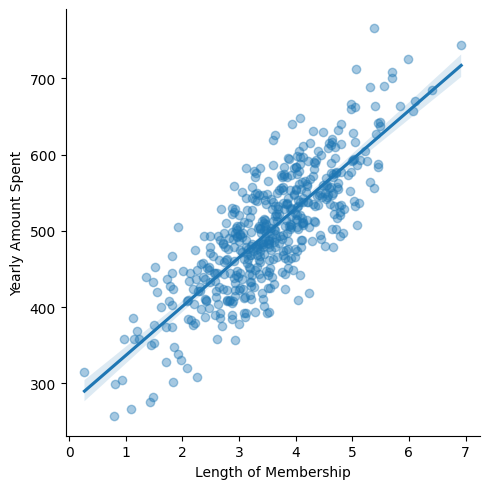

In [ ]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=data,scatter_kws={'alpha':0.4})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

features=data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
# features
target=data['Yearly Amount Spent']
# target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

In [ ]:
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln=LinearRegression()

In [ ]:
ln.fit(x_train,y_train)


LinearRegression()

In [ ]:
ln.coef_

array([25.72425621, 38.59713548,  0.45914786, 61.67473243])

In [ ]:
df=pd.DataFrame(ln.coef_,features.columns,columns=['Coeff'])
df

,Coeff
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


In [ ]:
#predictions
predictions=ln.predict(x_test)
predictions

array([403.66993074, 542.57756279, 427.06591624, 502.02460418,
       410.12143558, 569.93442498, 531.93431357, 506.29651001,
       408.71870637, 473.97737102, 441.46912713, 425.33703067,
       425.12972304, 527.61676736, 431.45684042, 424.07691828,
       575.76543275, 484.8985653 , 458.35936887, 481.96502194,
       502.32441485, 513.63783571, 507.58877004, 646.57464281,
       450.24372153, 496.27043414, 556.40457802, 554.95630854,
       399.64237181, 325.84623149, 532.89783273, 478.12238679,
       501.05701852, 305.9733584 , 505.77244465, 483.79591959,
       518.83315284, 438.18241848, 456.71094212, 471.04609471,
       494.44008982, 445.31155776, 508.78802753, 501.04594195,
       488.83499651, 535.38079536, 595.20129815, 514.04714863,
       280.76758287, 433.10112339, 421.70823429, 481.23640159,
       584.71372254, 608.77480967, 563.98513435, 494.72804856,
       394.52133409, 456.41975284, 573.08767517, 499.69842395,
       512.83276999, 392.12434057, 480.05057696, 481.54

<Axes: ylabel='Yearly Amount Spent'>

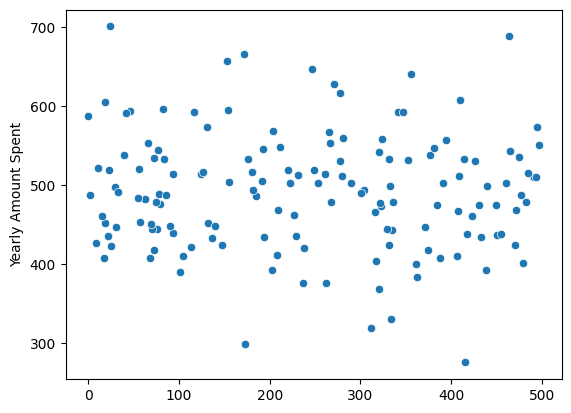

In [ ]:
sns.scatterplot(y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_error ,mean_squared_error
import math

In [ ]:
print ("MAE:",mean_absolute_error(y_test,predictions))
print ("MSE:",mean_squared_error(y_test,predictions))
print ("RMSE:",math.sqrt(mean_squared_error(y_test,predictions)))

MAE: 8.42609163545152
MSE: 103.91554120775237
RMSE: 10.193897253148688


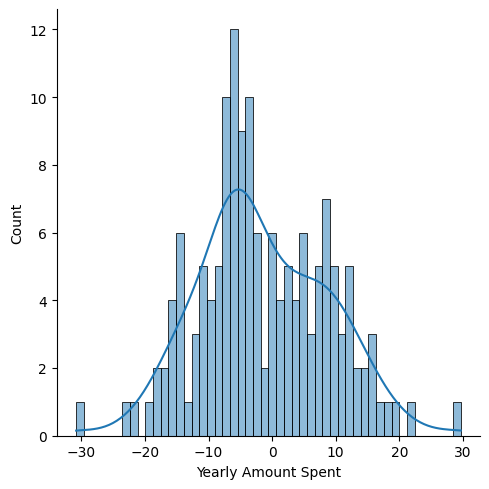

In [ ]:
#  residuals
# sns.distplot((y_test-predictions),bins=50)
residuals=y_test-predictions
# sns.histplot(residuals,kde=True,bins=50)
sns.displot(residuals,kde=True,bins=50)

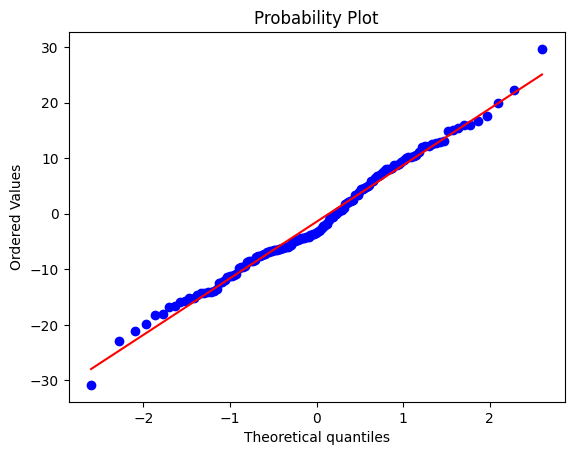

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()

In [ ]:
# prompt: build this model convert to pickile and creae a gradio app to get input from user and predict the amount
!pip install gradio matplotlib
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

# Load the dataset (replace with your actual file path)
data = pd.read_csv("/content/Ecommerce Customers.csv")

# Define features and target variable
features = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
target = data['Yearly Amount Spent']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
ln = LinearRegression()
ln.fit(x_train, y_train)

# Save the trained model to a pickle file
filename = 'ecommerce_model.pkl'
pickle.dump(ln, open(filename, 'wb'))

# Load the saved model (for the Gradio app)
loaded_model = pickle.load(open(filename, 'rb'))

# Define the prediction function for the Gradio interface
def predict_amount(avg_session_length, time_on_app, time_on_website, length_of_membership):
    input_data = np.array([[avg_session_length, time_on_app, time_on_website, length_of_membership]])
    prediction = loaded_model.predict(input_data)[0]
    return f"{prediction:.2f}"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_amount,
    inputs=[
        gr.Number(label="Avg. Session Length"),
        gr.Number(label="Time on App"),
        gr.Number(label="Time on Website"),
        gr.Number(label="Length of Membership")
    ],
    outputs=gr.Textbox(label="Predicted Yearly Amount Spent"),
    title="Ecommerce Customer Yearly Amount Spent Prediction",
    description="Enter customer features to predict their yearly amount spent."
)

# Launch the Gradio app
iface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.1 MB/s eta 0:00:00
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7cf70a66ca88164cb3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spa